In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:
df = pd.read_csv('../../../../Datasets/ML/student_result.csv')

NameError: name 'pd' is not defined

In [3]:
df

,Study_Hours,Attendance,Pass_Fail
0,3.745401,51.107976,0
1,9.507143,72.514057,1
2,7.319939,92.376750,0
3,5.986585,83.933493,1
4,1.560186,88.393669,0
...,...,...,...
995,0.915821,79.417309,0
996,9.173136,97.396877,1
997,1.368186,44.137481,0
998,9.502374,43.423283,1


In [4]:
X = df.drop('Pass_Fail', axis = 1)
y = df['Pass_Fail']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [6]:
tree = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 5)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
accuracy_score(y_test, tree.predict(X_test))

0.69

In [8]:
# making a pruned model
pruned_tree = DecisionTreeClassifier(min_samples_split = 8,
                                     min_samples_leaf = 2,
                                     max_depth = 6,
                                     criterion = 'gini',
                                     max_features = 'sqrt')
pruned_tree.fit(X_train, y_train)
accuracy_score(y_test, pruned_tree.predict(X_test))

0.765

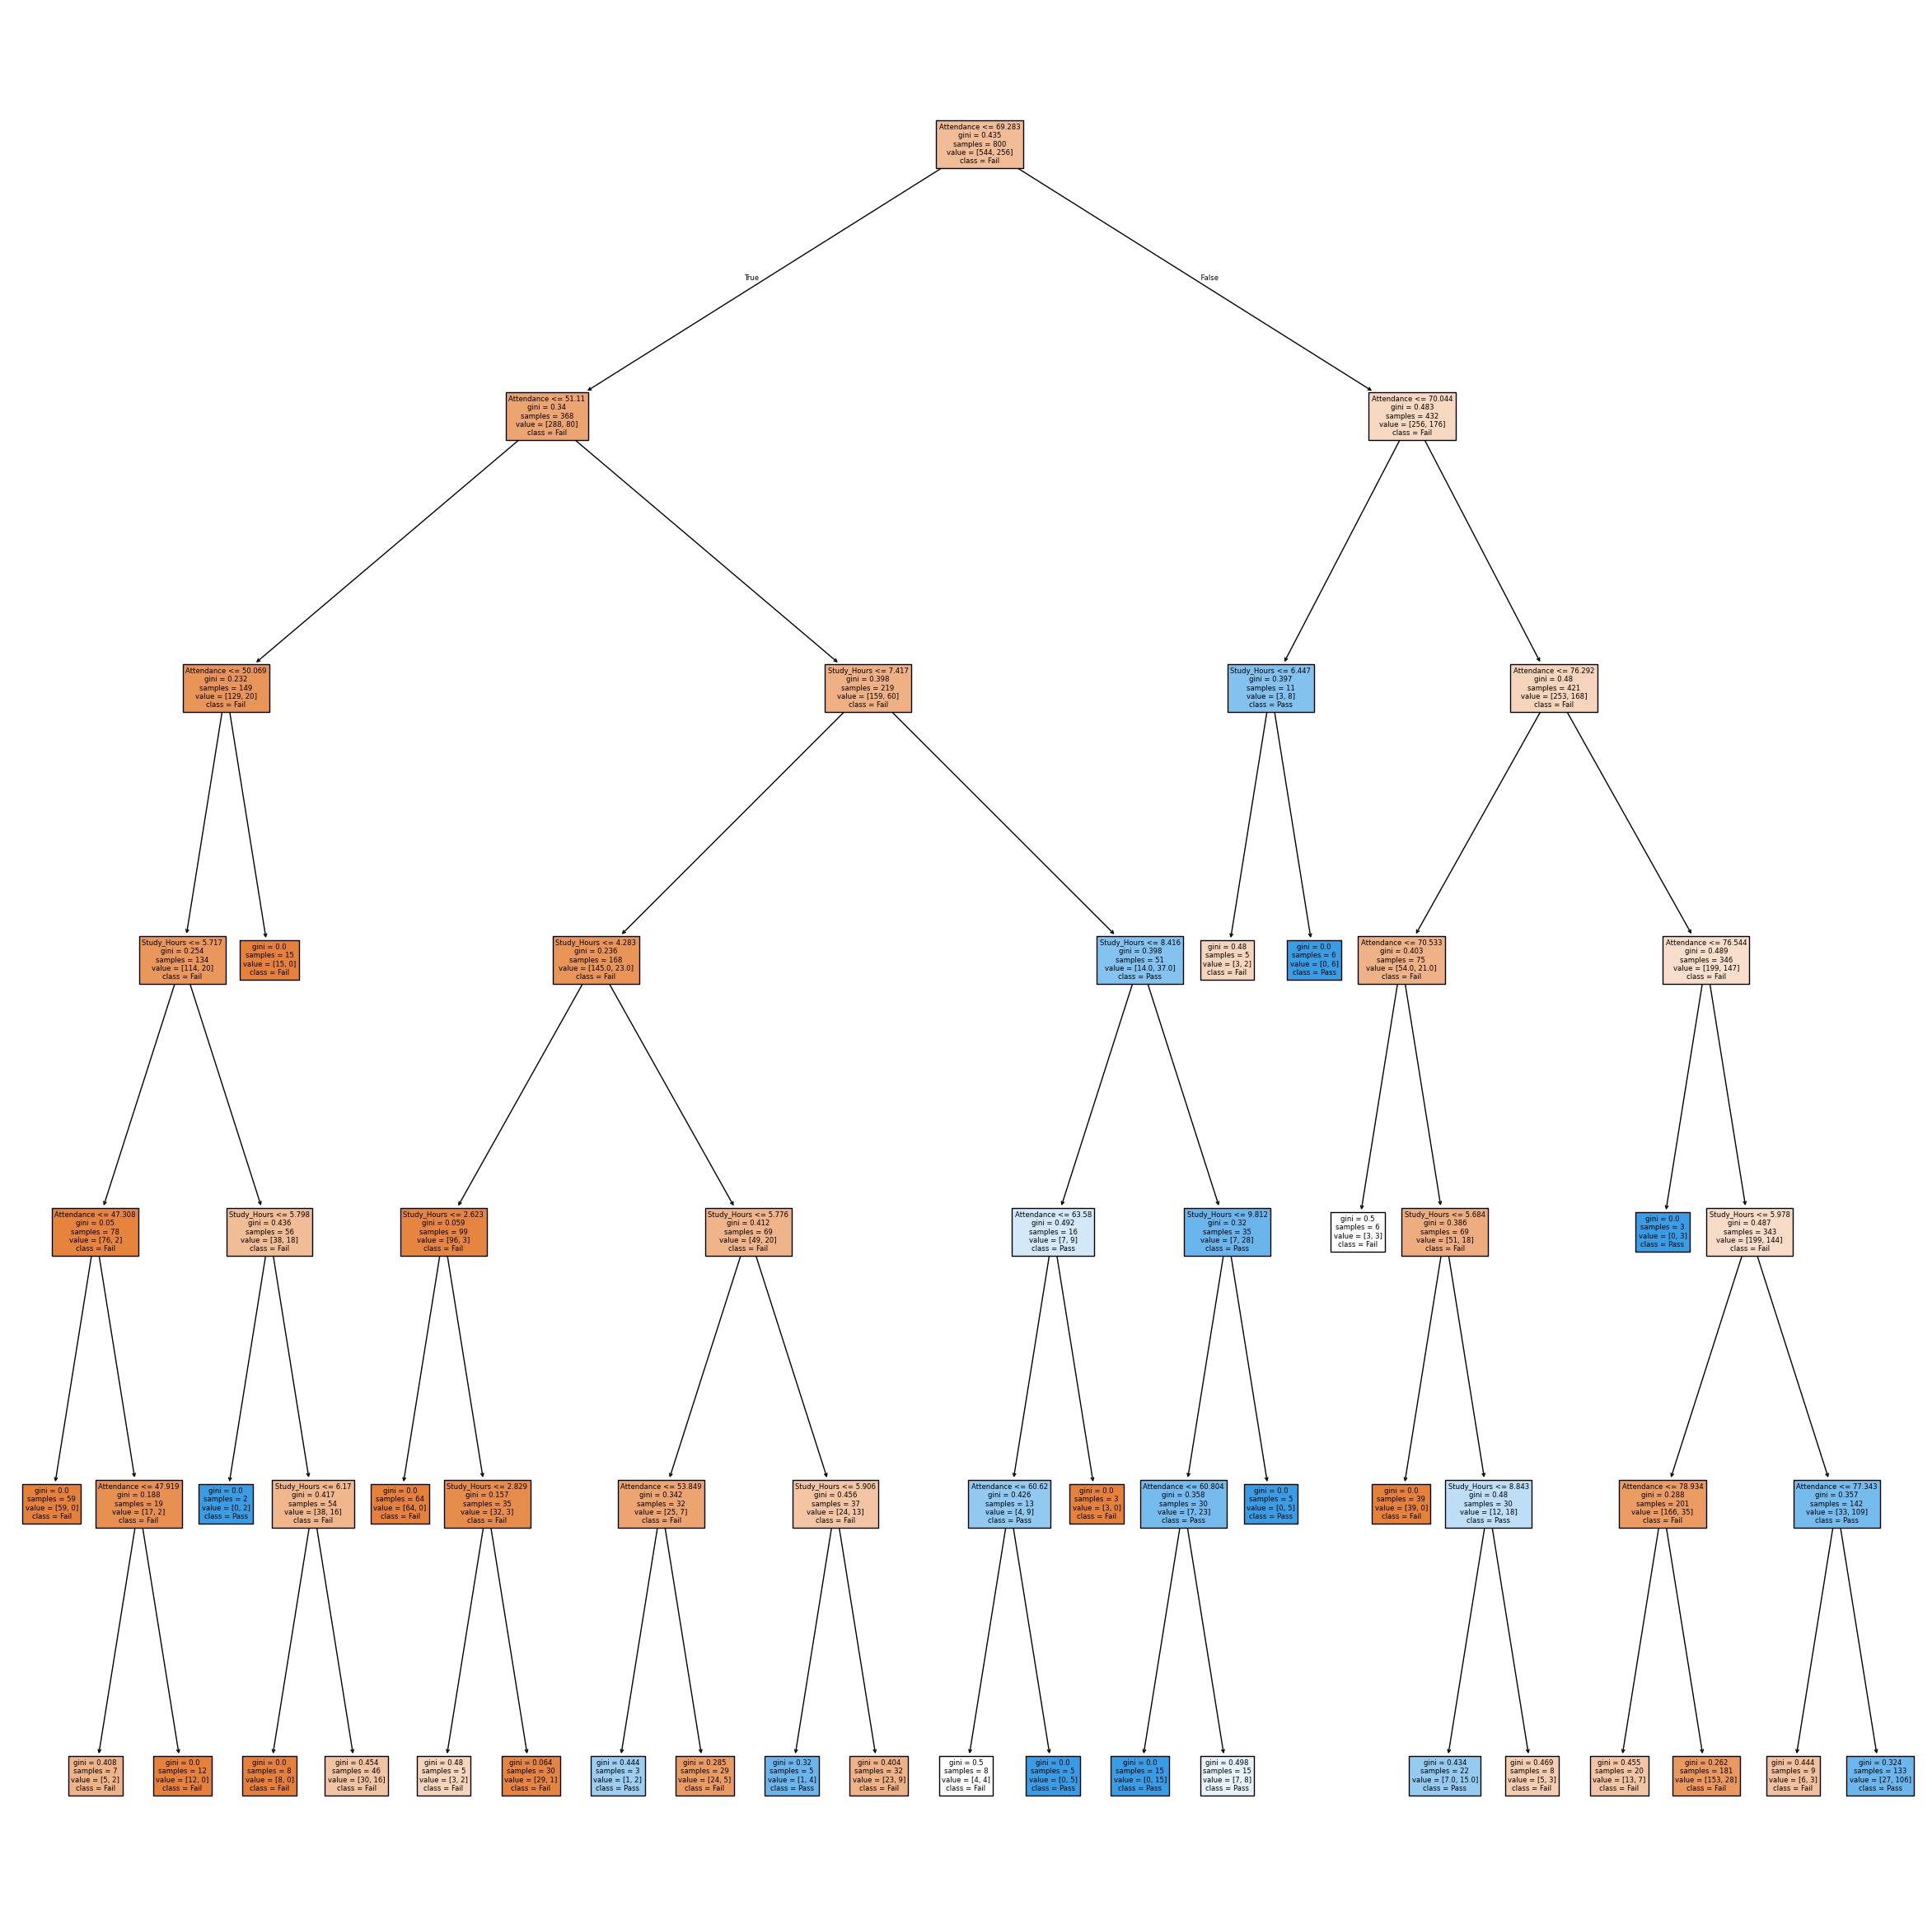

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (30, 30))
plot_tree(pruned_tree, feature_names = df.drop('Pass_Fail', axis = 1).columns, class_names = ['Fail', 'Pass'], filled = True)
plt.show()